![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [212]:
import warnings
warnings.filterwarnings('ignore')

In [213]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score, confusion_matrix


In [214]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [215]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [216]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [217]:
#Descripción general del dataset
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


In [218]:
print('Forma del dataframe:')
print('Existen ' + str(bikes.shape[0]) + ' registros con ' + str(bikes.shape[1]) + ' variables.')

Forma del dataframe:
Existen 10886 registros con 12 variables.


In [219]:
#Revisión de datos nulos.
df_subset = bikes[["season", "hour"]]
null_counts = df_subset.isnull().sum()

print(null_counts)

season    0
hour      0
dtype: int64


Según las descripciones de los datos relacionadas anteriormente, podemos evidenciar:

Para la variable *season*:

- Se tienen 4 estaciones o temporadas (1:Invierno, 2:Primavera, 3:Verano y 4:Otoño) 

- En promedio, la mayor cantidad de bicicletas alquiladas se registraron en la temporada de Verano (3) y la menor cantidad se registró en la temporada de invierno (1).

- No existen valores nulos.

Para la variable *hour*:

- Se observa un servicio de 24hrs, por ello encontramos desde hora 0 hasta 23.

- En promedio, la hora en la que se alquila la mayor cantidad de bicicletas es a las 17:00hrs, por su parte, la hora en la que menos bicicletas son alquiladas es a las 04:00hrs.

- La mayor cantidad de bicicletas alquiladas surge a partir del medio día.

- No existen valores nulos.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

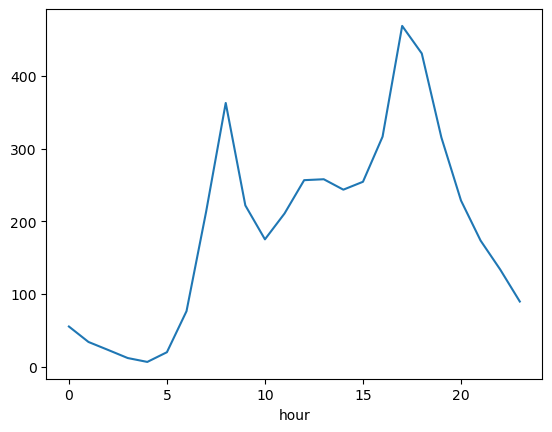

In [220]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

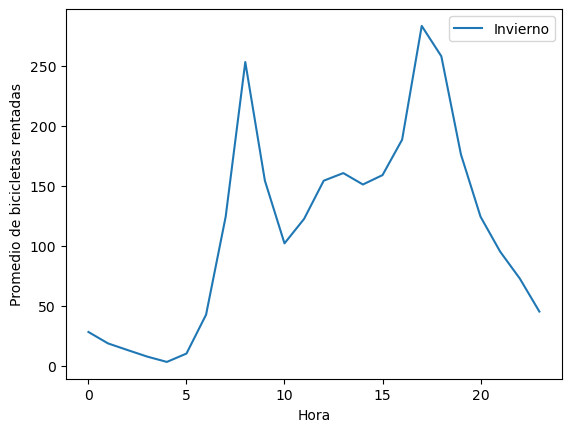

In [221]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 

# Filtro de datos cuando "season" es igual a 1 (invierno)
data_invierno = bikes[bikes["season"] == 1]

# Se agrupan datos por "hour" y se calcula el promedio de bicicletas rentadas
bicicletas_rentadas_promedio_invierno = data_invierno.groupby("hour")["total"].mean()

# Se genera la gráfica
plt.plot(bicicletas_rentadas_promedio_invierno.index, bicicletas_rentadas_promedio_invierno, label="Invierno")

plt.xlabel("Hora")
plt.ylabel("Promedio de bicicletas rentadas")
plt.legend()

plt.show()

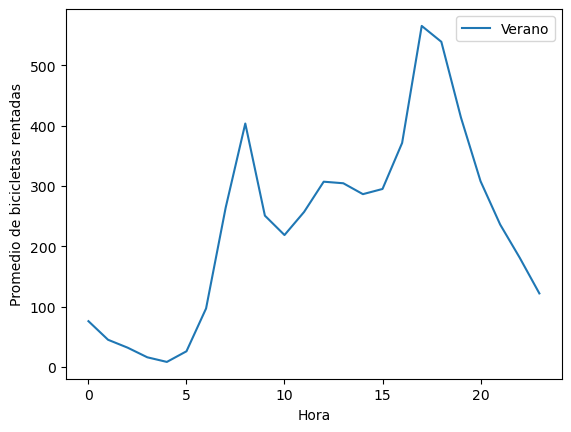

In [222]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 

# Filtro de datos cuando "season" es igual a 3 (verano)
data_verano = bikes[bikes["season"] == 3]

# Se agrupan datos por "hour" y se calcula el promedio de bicicletas rentadas
bicicletas_rentadas_promedio_verano = data_verano.groupby("hour")["total"].mean()

# Se genera la gráfica
plt.plot(bicicletas_rentadas_promedio_verano.index, bicicletas_rentadas_promedio_verano, label="Verano")

plt.xlabel("Hora")
plt.ylabel("Promedio de bicicletas rentadas")
plt.legend()

plt.show()

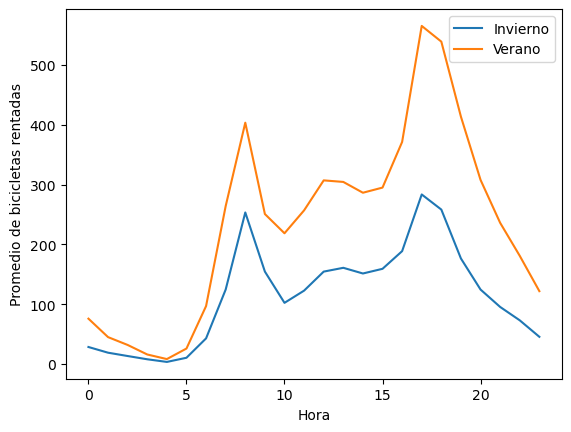

In [223]:
# Visualización conjunta


# Filtro de datos cuando  "season" es igual a 1 (invierno)
data_invierno = bikes[bikes["season"] == 1]

# Filtro de datos cuando "season" es igual a 3 (verano)
data_verano = bikes[bikes["season"] == 3]

# Se agrupan datos por "hour" y se calcula el promedio de bicicletas rentadas
bicicletas_rentadas_promedio_invierno = data_invierno.groupby("hour")["total"].mean()
bicicletas_rentadas_promedio_verano = data_verano.groupby("hour")["total"].mean()

# Se genera la gráfica
plt.plot(bicicletas_rentadas_promedio_invierno.index, bicicletas_rentadas_promedio_invierno, label="Invierno")
plt.plot(bicicletas_rentadas_promedio_verano.index, bicicletas_rentadas_promedio_verano, label="Verano")
plt.xlabel("Hora")
plt.ylabel("Promedio de bicicletas rentadas")
plt.legend()

plt.show()

Acorde a los gráficos anteriores, podemos evidenciar que a pesar de que el comportamiento a través de las horas es similar, presentando picos de mayor alquiler aproximadamente a las 08:00hrs y a las 17:00hrs; entre estaciones o temporadas no lo es, en Verano se alquila un número superior de bicicletas respecto a Invierno, el cual es mayor al doble de las que son alquiladas en Invierno.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

##### Modelo de regresión lineal

In [224]:

# Convertir la variable "season" en variables dummy
dummies = pd.get_dummies(bikes['season'], prefix='season')

# Crear un DataFrame con las variables predictoras y la variable respuesta
X = pd.concat([dummies, bikes['hour']], axis=1)
y = bikes['total']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo utilizando métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('R^2:', r2)

MSE: 25409.920498970598
R^2: 0.2301642114593644


Se evidencia un valor de R² bastante inferior, lo cual indica que el modelo explica en un 23% la variabilidad de los datos. Se deben evaluar opciones adicionales en cuanto a modelos para validar si puede mejorar este y otros coeficientes. 

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [225]:
# Celda 4
# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

In [226]:
#Ejemplo con primera variable
# Impresión variable a usar (Hits)
j = 1
print(X.columns[j])

season_2


In [227]:
# División de la variable Hits en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

array([0., 1.])

In [228]:
# División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
k=1
filter_l = X.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [229]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [230]:
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
gini_l

-67077.9598174006

In [231]:
# Gini index de las observaciones que tienen un valor mayor o igual al punto de corte seleccionado
gini_r = gini(y_r)
gini_r

-92235.80365360077

In [232]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [233]:
# Ganancia de la variable 'Hits' en el punto de corte selecionado
gini_impurity(X.iloc[:, j], y, splits[k])

375.8498188178346

In [234]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [235]:
# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(X, y, 5)
j, split, gain

(4, 8.0, 18268.811823533004)

In [236]:
# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [237]:
y.shape[0], y_l.shape[0], y_r.shape[0]

(10886, 3594, 7292)

In [238]:
y.mean(), y_l.mean(), y_r.mean()

(191.57413191254824, 55.437673900946024, 258.6715578716402)

In [239]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [240]:
# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=1, num_pct=10)

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [4, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': -1,
  'n_samples': 3594,
  'gain': 7207.700659959655},
 'sr': {'y_pred': 1,
  'y_prob': 258.6007677543186,
  'level': 1,
  'split': -1,
  'n_samples': 7292,
  'gain': 7392.920792160614}}

In [241]:
tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10)
tree

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [4, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [4, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [4, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': 382.8088308604629},
   'sr': {'y_pred': 1,
    'y_prob': 75.92778993435448,
    'level': 3,
    'split': -1,
    'n_samples': 455,
    'gain': 743.095592335012}},
  'sr': {'y_pred': 1,
   'y_prob': 212.18599562363238,
   'level': 2,
   'split': [0, 1.0],
   'n_samples': 455,
   'gain': 5197.1071057533845,
   'sl': {'y_pred': 1,
    'y_prob': 241.01162790697674,
    'level': 3,
    'split': -1,
    'n_samples': 342,
    'gain': 467.29291918881063},
   'sr': {'y_pr

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [242]:
# Celda 5

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [243]:
X = bikes[['season', 'hour']]
y = bikes['total']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [244]:
model = DecisionTreeRegressor(max_depth=9, min_samples_split=10, random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=9, min_samples_split=10, random_state=42)

In [245]:
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(mse)
r2 = r2_score(y_val, y_pred)
print('R^2:', r2)

13451.363196184311
R^2: 0.5924685874754883


Utilizando árboles de decisión, se obtuvo un R² de 0.59 quiere decir que se explica con este modelo el 59% de la variabilidad total en los datos. Respecto al modelo usado en el punto 3, se evidencia un R² superior y un MSE de 13451 el cual es inferior, indicando mejor poder predictivo del árbol de decisión respecto a la regresión lineal en este ejercicio.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [303]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [304]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [305]:
X

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,2.0,...,0.470000,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8
1,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,0.0,...,0.342778,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1
2,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,0.0,...,0.516263,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0
3,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,0.0,...,0.436654,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0
4,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,0.0,...,0.346429,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,523.0,10.0,660.0,0.493884,1.0,0.633971,20.0,4.0,1.0,0.0,...,0.311531,0.050000,0.50,-0.258730,-0.80,-0.100000,0.1,0.0,0.4,0.0
5996,139.0,9.0,144.0,0.647887,1.0,0.739583,15.0,4.0,10.0,1.0,...,0.287273,0.100000,0.60,-0.250000,-0.30,-0.200000,0.0,0.0,0.5,0.0
5997,623.0,8.0,536.0,0.512287,1.0,0.647929,6.0,2.0,1.0,1.0,...,0.304167,0.100000,0.40,-0.156250,-0.30,-0.100000,0.0,0.0,0.5,0.0
5998,584.0,10.0,266.0,0.534413,1.0,0.605882,9.0,6.0,1.0,0.0,...,0.304924,0.100000,0.60,-0.250000,-0.40,-0.100000,0.0,0.0,0.5,0.0


In [306]:
y

0       1
1       0
2       0
3       0
4       0
       ..
5995    0
5996    1
5997    0
5998    0
5999    1
Name: Popular, Length: 6000, dtype: int64

In [322]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

##### Modelo árbol de decisión

In [323]:
from sklearn.metrics import accuracy_score, f1_score

In [324]:
# Celda 6
#Árbol de decisión

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

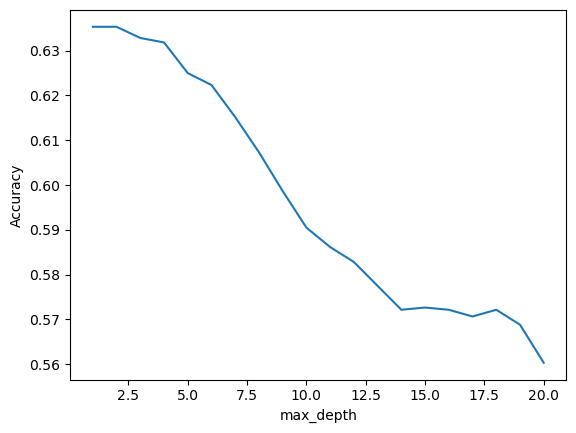

In [325]:
# Gráfica max_depth versus Accuracyy
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [326]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6353333333333333, 2)

In [327]:
# max_depth=2 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [328]:
# Predicción de las observaciones del set de test para el modelo de árbol de decisión
y_pred_1 = clf.predict(X_test)

Cálculo Accuracy:

In [329]:
metrics.accuracy_score(y_pred_1, y_test)

0.6453333333333333

Cálculo F1 Score:

In [330]:
metrics.f1_score(y_pred_1, y_test)


0.6448598130841121

##### Modelo regresión logística

In [331]:
#Regresión Logística

clfRegLog= LogisticRegression(random_state=0,max_iter=10000)
clfRegLog.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [332]:
prediccionesRegLog=clfRegLog.predict(X_test)
prediccionesProbRegLog=clfRegLog.predict_proba(X_test)

In [333]:
y_pred_2 = prediccionesRegLog

Cálculo Accuracy:

In [334]:
metrics.accuracy_score(y_pred_2, y_test)

0.6206666666666667

Cálculo F1 Score:

In [335]:
metrics.f1_score(y_pred_2, y_test)

0.60893470790378

Respecto al Accuracy calculado para el modelo de árboles de decisión y de regresión logística, se evidencia que el modelo de árboles de decisión presenta un valor más alto en cuanto a porcentaje de precisiones correctas (0.64), indicando por una pequeña diferencia un mejor rendimiento en este aspecto.

En cuanto al F1 Score, también se evidencia un valor más alto en el modelo de árboles de decisión (0.64) respecto al de regresión logística (0.61), indicando un valor un poco más alto en cuanto a precisión y exhaustividad, por ende, un mejor rendimiento en estos aspectos.


En general, el modelo de árboles de decisión puede predecir mejor si la noticia es popular o no.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [343]:
from sklearn.utils import resample
import numpy as np

# Realizar bootstrap y generar 300 sets de entrenamiento nuevos
n_iterations = 300
n_size = len(df)
bootstrap_sets = []
for i in range(n_iterations):
    # Generar una muestra bootstrap
    bootstrap_sample = resample(df, n_samples=n_size)
    # Agregar la muestra bootstrap a la lista
    bootstrap_sets.append(bootstrap_sample)

In [344]:
# Dividir las muestras en tres grupos de 100
set_dt1 = bootstrap_sets[:100]
set_dt2 = bootstrap_sets[100:200]
set_RL = bootstrap_sets[200:]

In [302]:
set_dt1

[                                                    url  timedelta  \
 748   http://mashable.com/2014/04/13/game-of-thrones...      270.0   
 2828   http://mashable.com/2014/11/12/youtube-freemium/       55.0   
 182       http://mashable.com/2014/08/07/skeleton-noah/      153.0   
 848   http://mashable.com/2013/08/08/elon-musk-hyper...      518.0   
 5178     http://mashable.com/2013/06/04/zynga-lay-offs/      583.0   
 ...                                                 ...        ...   
 3236  http://mashable.com/2013/01/14/coldplay-safe-r...      724.0   
 4184  http://mashable.com/2014/07/29/julie-benz-snap...      163.0   
 3546  http://mashable.com/2014/07/28/its-finally-ove...      164.0   
 235   http://mashable.com/2014/03/05/oscars-snubbed-...      309.0   
 51    http://mashable.com/2013/08/21/patrick-stewart...      505.0   
 
       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
 748             11.0             344.0         0.595745            

In [299]:
# Uso de BaggingClassifier de la libreria (sklearn) donde se usa el modelo DecisionTreeClassifier como estimador
from sklearn.ensemble import BaggingClassifier
bagclass = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, 
                          bootstrap=True, oob_score=True, random_state=1)

In [348]:
X = set_dt1[:, :-1]  # Todas las columnas excepto la última son datos de entrada
y = set_dt1[:, -1]   # La última columna es el dato de salida


TypeError: list indices must be integers or slices, not tuple

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenemiento del modelo con set de entrenamiento y predicción en el set de test
bagclass.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

In [342]:
# Cálculo del error del modelo
np.sqrt(mean_squared_error(y_test, y_pred))

TypeError: list indices must be integers or slices, not tuple

##### 100 árboles de decisión donde min_samples_leaf tome un valor de su elección

##### 100 regresiones logísticas

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

##### 100 árboles de decisión donde max_depth tome un valor de su elección

In [ ]:
# Celda 8
samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

##### 100 árboles de decisión donde min_samples_leaf tome un valor de su elección

##### 100 regresiones logísticas

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9